#7.2
#(1) Identifying the genre of a song with neural networks

In [2]:
import librosa
import librosa.feature
import librosa.display
import glob
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.utils.np_utils import to_categorical

In [3]:
def display_mfcc(song):
    y, _ = librosa.load(song)
    mfcc = librosa.feature.mfcc(y)

    plt.figure(figsize=(10, 4))
    librosa.display.specshow(mfcc, x_axis='time', y_axis='mel')
    plt.colorbar()
    plt.title(song)
    plt.tight_layout()
    plt.show()

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!git clone https://github.com/creatorbeen/AlxD_2021_HYOBIN.git

Cloning into 'AlxD_2021_HYOBIN'...
remote: Enumerating objects: 1095, done.
remote: Counting objects: 100% (350/350), done.
remote: Compressing objects: 100% (334/334), done.
remote: Total 1095 (delta 15), reused 344 (delta 13), pack-reused 745
Receiving objects: 100% (1095/1095), 1.15 GiB | 31.82 MiB/s, done.
Resolving deltas: 100% (22/22), done.
Checking out files: 100% (1043/1043), done.


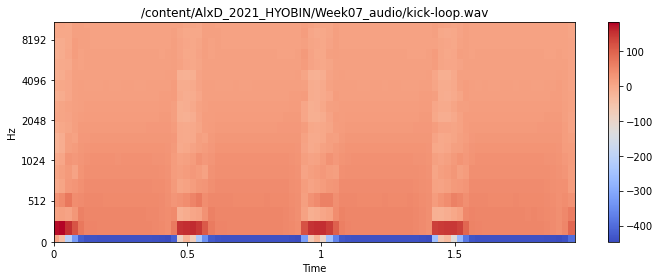

In [5]:
display_mfcc('/content/AlxD_2021_HYOBIN/Week07_audio/kick-loop.wav')

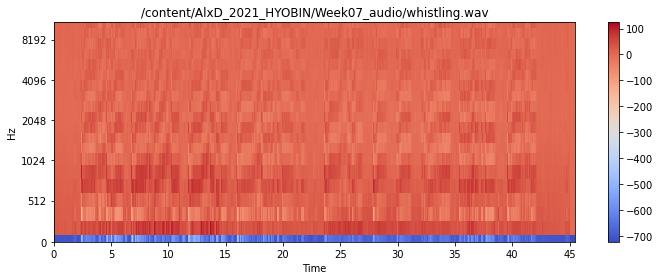

In [6]:
display_mfcc('/content/AlxD_2021_HYOBIN/Week07_audio/whistling.wav')

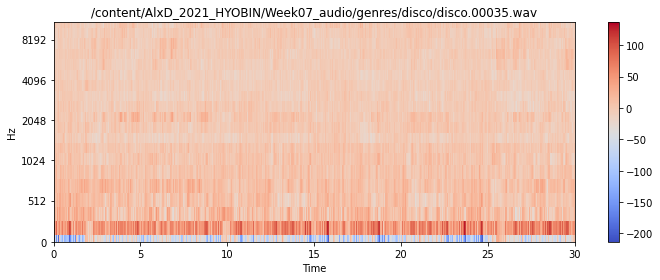

In [7]:
display_mfcc('/content/AlxD_2021_HYOBIN/Week07_audio/genres/disco/disco.00035.wav')

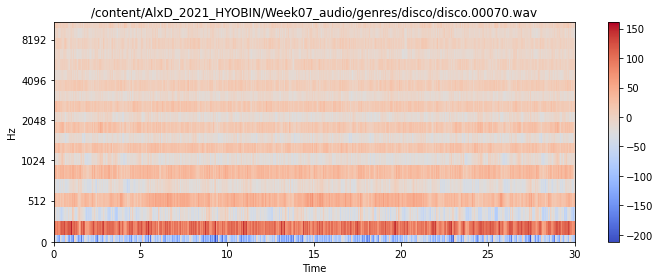

In [8]:
display_mfcc('/content/AlxD_2021_HYOBIN/Week07_audio/genres/disco/disco.00070.wav')

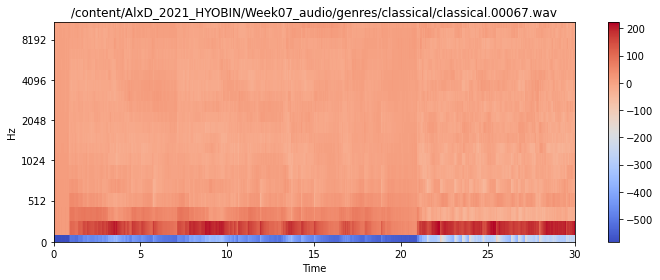

In [9]:
display_mfcc('/content/AlxD_2021_HYOBIN/Week07_audio/genres/classical/classical.00067.wav')

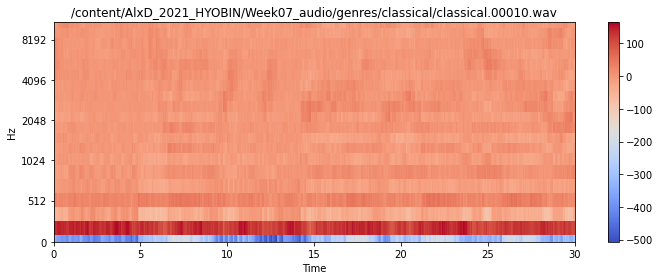

In [10]:
display_mfcc('/content/AlxD_2021_HYOBIN/Week07_audio/genres/classical/classical.00010.wav')

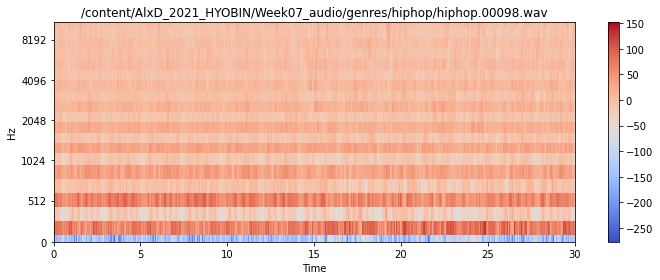

In [11]:
display_mfcc('/content/AlxD_2021_HYOBIN/Week07_audio/genres/hiphop/hiphop.00098.wav')

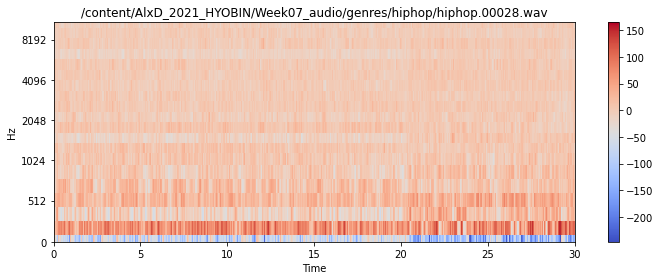

In [12]:
display_mfcc('/content/AlxD_2021_HYOBIN/Week07_audio/genres/hiphop/hiphop.00028.wav')

In [29]:
def extract_features_song(f):
    y, _ = librosa.load(f)

    # get Mel-frequency cepstral coefficients
    mfcc = librosa.feature.mfcc(y)
    # normalize values between -1,1 (divide by max)
    mfcc /= np.amax(np.absolute(mfcc))

    return np.ndarray.flatten(mfcc)[:25000]

In [30]:
def generate_features_and_labels():
    all_features = []
    all_labels = []

    genres = ['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']
    for genre in genres:
        sound_files = glob.glob('/content/AlxD_2021_HYOBIN/Week07_audio/genres/'+genre+'/*.wav')
        print('Processing %d songs in %s genre...' % (len(sound_files), genre))
        for f in sound_files:
            features = extract_features_song(f)
            all_features.append(features)
            all_labels.append(genre)

    # convert labels to one-hot encoding
    label_uniq_ids, label_row_ids = np.unique(all_labels, return_inverse=True)
    label_row_ids = label_row_ids.astype(np.int32, copy=False)
    onehot_labels = to_categorical(label_row_ids, len(label_uniq_ids))
    return np.stack(all_features), onehot_labels

In [31]:
features, labels = generate_features_and_labels()

Processing 100 songs in blues genre...
Processing 100 songs in classical genre...
Processing 100 songs in country genre...
Processing 100 songs in disco genre...
Processing 100 songs in hiphop genre...
Processing 100 songs in jazz genre...
Processing 100 songs in metal genre...
Processing 100 songs in pop genre...
Processing 100 songs in reggae genre...
Processing 100 songs in rock genre...


In [32]:
print(np.shape(features))
print(np.shape(labels))

training_split = 0.8

# last column has genre, turn it into unique ids
alldata = np.column_stack((features, labels))

np.random.shuffle(alldata)
splitidx = int(len(alldata) * training_split)
train, test = alldata[:splitidx,:], alldata[splitidx:,:]

print(np.shape(train))
print(np.shape(test))

train_input = train[:,:-10]
train_labels = train[:,-10:]

test_input = test[:,:-10]
test_labels = test[:,-10:]

print(np.shape(train_input))
print(np.shape(train_labels))

(1000, 25000)
(1000, 10)
(800, 25010)
(200, 25010)
(800, 25000)
(800, 10)


In [33]:
model = Sequential([
    Dense(100, input_dim=np.shape(train_input)[1]),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
    ])

model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
print(model.summary())

model.fit(train_input, train_labels, epochs=10, batch_size=32,
          validation_split=0.2)

loss, acc = model.evaluate(test_input, test_labels, batch_size=32)

print("Done!")
print("Loss: %.4f, accuracy: %.4f" % (loss, acc))

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_2 (Dense)              (None, 100)               2500100   
_________________________________________________________________
activation_2 (Activation)    (None, 100)               0         
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1010      
_________________________________________________________________
activation_3 (Activation)    (None, 10)                0         
Total params: 2,501,110
Trainable params: 2,501,110
Non-trainable params: 0
_________________________________________________________________
None
Epoch 1/10
20/20 [==============================] - 1s 32ms/step - loss: 2.5369 - accuracy: 0.2395 - val_loss: 1.9076 - val_accuracy: 0.3438
Epoch 2/10
20/20 [==============================] - 0s 23ms/step - loss: 1.5827 - accuracy: 0.41

# 7.3

In [129]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [132]:
genre = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/genre_clean.csv')

In [133]:
genre.head()

,files,zero_crossing_rate,spectral_centroid,spectral_rolloff,mfcc_1,mfcc_2,mfcc_3,mfcc_4,mfcc_5,mfcc_6,mfcc_7,mfcc_8,mfcc_9,mfcc_10,mfcc_11,mfcc_12,mfcc_13,labels,y
0,pop.00016.wav,0.153314,3488.787937,7496.360832,-97.009735,51.838009,18.752640,20.487221,5.610600,3.581937,5.581754,0.741877,7.333603,1.651344,-2.700590,-0.436587,-1.081343,pop,8
1,country.00027.wav,0.097350,2011.642324,3907.593566,-100.742447,106.984848,-27.161005,29.106436,5.043511,-5.420127,3.246624,-5.181634,-5.126184,-0.822001,-3.837446,-2.702147,-6.640826,country,3
2,jazz.00020.wav,0.032963,1171.224448,2579.629439,-376.732025,119.150520,-2.952156,48.510254,13.165588,21.252401,0.019278,8.011803,-0.398331,2.379533,-0.028779,0.903352,1.666823,jazz,6
3,reggae.00002.wav,0.075103,1796.838299,3924.821794,-189.065430,110.858261,3.004887,48.370605,-6.414668,20.720901,-12.555557,15.879529,-13.624746,9.412742,-8.037606,8.087933,-10.635764,reggae,9
4,country.00008.wav,0.104563,2505.711892,5479.959462,-19.724722,76.649055,-4.828754,32.236172,7.710165,17.190840,-1.488423,9.151179,2.756343,9.147740,-2.651406,7.527003,0.391620,country,3


In [134]:
# Defining our features and predictor variable
X = genre.drop(['files', 'labels', 'y'], axis=1)
y = genre['y']

In [135]:
# Getting our baseline accuracy
y.value_counts(normalize=True)

10    0.1
9     0.1
8     0.1
7     0.1
6     0.1
5     0.1
4     0.1
3     0.1
2     0.1
1     0.1
Name: y, dtype: float64

In [136]:
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42, stratify=y)

In [137]:
# Scaling the features
ss = StandardScaler()
X_train_sc = ss.fit_transform(X_train)
X_test_sc = ss.transform(X_test)

In [138]:
# Instantiating and fitting a basic random forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [139]:
# Checking the accuracy
print(f'Score on the training set: {rf.score(X_train, y_train)}')
print(f'Score on the test set: {rf.score(X_test, y_test)}')

Score on the training set: 1.0
Score on the test set: 0.6933333333333334


#7.2
#(2) Revising the spam detector to use neural networks

In [32]:
import pandas as pd
from keras.preprocessing.text import Tokenizer
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.utils import np_utils
from sklearn.model_selection import StratifiedKFold

In [33]:
d = pd.concat([pd.read_csv("/content/AlxD_2021_HYOBIN/Week04_Youtube_dataset/Youtube01-Psy.csv"),
               pd.read_csv("/content/AlxD_2021_HYOBIN/Week04_Youtube_dataset/Youtube02-KatyPerry.csv"),
               pd.read_csv("/content/AlxD_2021_HYOBIN/Week04_Youtube_dataset/Youtube03-LMFAO.csv"),
               pd.read_csv("/content/AlxD_2021_HYOBIN/Week04_Youtube_dataset/Youtube04-Eminem.csv"),
               pd.read_csv("/content/AlxD_2021_HYOBIN/Week04_Youtube_dataset/Youtube05-Shakira.csv")])
d = d.sample(frac=1)

In [34]:
kfold = StratifiedKFold(n_splits=5)
splits = kfold.split(d, d['CLASS'])

In [35]:
for train, test in splits:
    print("Split")
    print(test)

Split
[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161
 162 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179
 180 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197
 198 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215
 216 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233
 234 235 236 237 238 239 240 241 242 243 244 

In [38]:
def train_and_test(train_idx, test_idx):
    
    train_content = d['CONTENT'].iloc[train_idx]
    test_content = d['CONTENT'].iloc[test_idx]
    
    tokenizer = Tokenizer(num_words=2000)
    
    # learn the training words (not the testing words!)
    tokenizer.fit_on_texts(train_content)

    # options for mode: binary, freq, tfidf
    d_train_inputs = tokenizer.texts_to_matrix(train_content, mode='tfidf')
    d_test_inputs = tokenizer.texts_to_matrix(test_content, mode='tfidf')

    # divide tfidf by max
    d_train_inputs = d_train_inputs/np.amax(np.absolute(d_train_inputs))
    d_test_inputs = d_test_inputs/np.amax(np.absolute(d_test_inputs))

    # subtract mean, to get values between -1 and 1
    d_train_inputs = d_train_inputs - np.mean(d_train_inputs)
    d_test_inputs = d_test_inputs - np.mean(d_test_inputs)

    # one-hot encoding of outputs
    d_train_outputs = np_utils.to_categorical(d['CLASS'].iloc[train_idx])
    d_test_outputs = np_utils.to_categorical(d['CLASS'].iloc[test_idx])

    model = Sequential()
    model.add(Dense(512, input_shape=(2000,)))
    model.add(Activation('relu'))
    model.add(Dropout(0.5))
    model.add(Dense(2))
    model.add(Activation('softmax'))

    model.compile(loss='categorical_crossentropy', optimizer='adamax',
                  metrics=['accuracy'])

    model.fit(d_train_inputs, d_train_outputs, epochs=10, batch_size=16)

    scores = model.evaluate(d_test_inputs, d_test_outputs)
    print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    return scores

In [39]:
kfold = StratifiedKFold(n_splits=5)
splits = kfold.split(d, d['CLASS'])
cvscores = []
for train_idx, test_idx, in splits:
    scores = train_and_test(train_idx, test_idx)
    cvscores.append(scores[1] * 100)

Epoch 1/10
98/98 [==============================] - 1s 6ms/step - loss: 0.6702 - accuracy: 0.6864
Epoch 2/10
98/98 [==============================] - 1s 6ms/step - loss: 0.5618 - accuracy: 0.8719
Epoch 3/10
98/98 [==============================] - 1s 6ms/step - loss: 0.4455 - accuracy: 0.8943
Epoch 4/10
98/98 [==============================] - 1s 6ms/step - loss: 0.3385 - accuracy: 0.9295
Epoch 5/10
98/98 [==============================] - 1s 6ms/step - loss: 0.2537 - accuracy: 0.9418
Epoch 6/10
98/98 [==============================] - 1s 6ms/step - loss: 0.2157 - accuracy: 0.9449
Epoch 7/10
98/98 [==============================] - 1s 6ms/step - loss: 0.1908 - accuracy: 0.9524
Epoch 8/10
98/98 [==============================] - 1s 6ms/step - loss: 0.1624 - accuracy: 0.9582
Epoch 9/10
98/98 [==============================] - 1s 6ms/step - loss: 0.1343 - accuracy: 0.9681
Epoch 10/10
13/13 [==============================] - 0s 3ms/step - loss: 0.1574 - accuracy: 0.9388
accuracy: 93.88%
Ep

In [40]:
print("%.2f%% (+/- %.2f%%)" % (np.mean(cvscores), np.std(cvscores)))

94.48% (+/- 1.03%)
